In [2]:
import pandas as pd
data_train=pd.read_csv('/content/train(1).csv')
data_test=pd.read_csv('/content/test(1).csv')

In [3]:
data_submission=pd.read_csv('/content/sample_submission.csv')
data_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Let's Understand the dataset

In [4]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
data_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
data_train.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [11]:
data_test.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [12]:
data_train.nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


so we can get to know that there are total 6 planets(3-homeplanet,3-destination)
Here,name of passengers,age doesn't play to predict the transported.

First we will analyze how many passengers are reached destination correctly and wrong.

We need to classify the passengerId that the Transported is True or False(Analyzed from sample submission of dataset)

#EDA

Which age people are transporting more and identify the tranported percentage

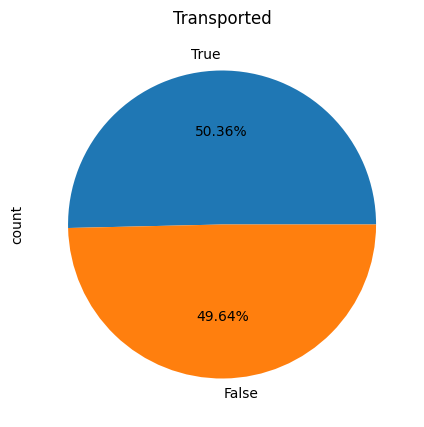

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

data_train.Transported.value_counts().plot(kind='pie',autopct='%.2f%%').set_title('Transported')
plt.show()

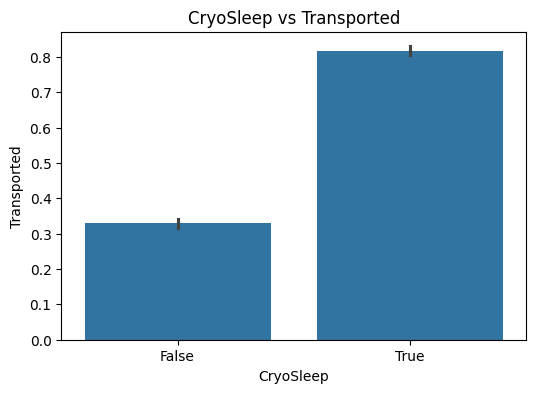

In [14]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x='CryoSleep', y='Transported', data=data_train)
plt.title('CryoSleep vs Transported')
plt.show()

From above we can understand that passenger in Cryosleep is **more likely** to Transported Truely,so will add the feature **Cryosleep** to predict Transported

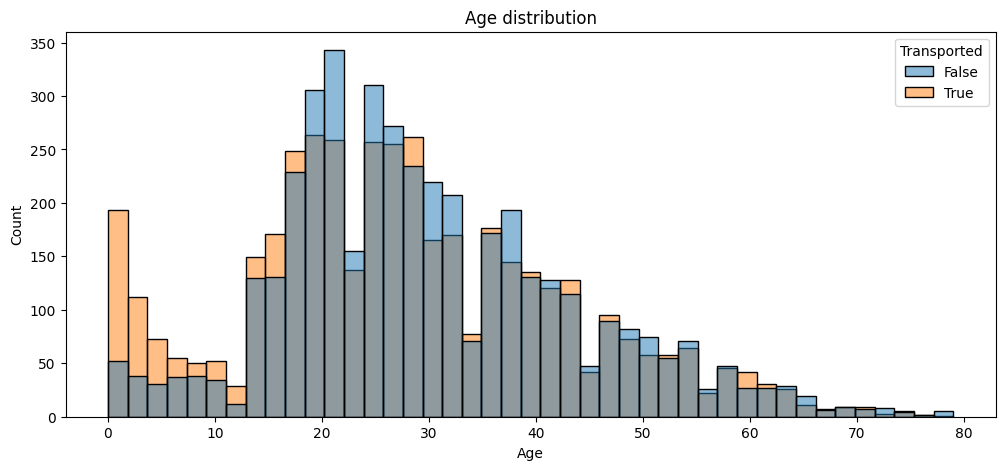

In [15]:
plt.figure(figsize=(12,5))

# Histogram
sns.histplot(x='Age', hue='Transported',data=data_train)
plt.title('Age distribution')
plt.show()

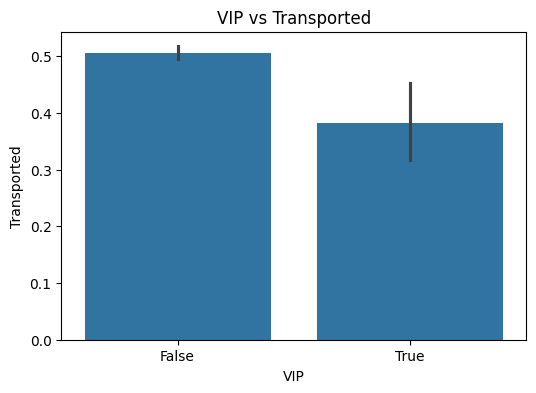

In [16]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x='VIP', y='Transported', data=data_train)
plt.title('VIP vs Transported')
plt.show()

So,VIP is very less in predicting true trasnported,so we don't want to work on this feature.

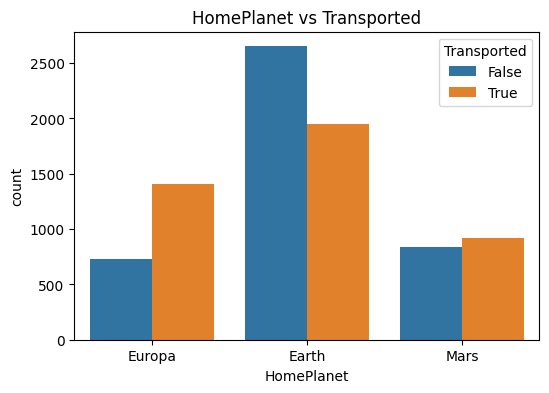

In [17]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='HomePlanet', hue='Transported', data=data_train)
plt.title('HomePlanet vs Transported')
plt.show()

here we can observe that passengers in **Earth** are not transported correctly compared to passengers from **Europa** and **Mars**

In [18]:
overview = data_train.groupby(['HomePlanet', 'Transported']).size().unstack()
print(overview)


Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           839    920


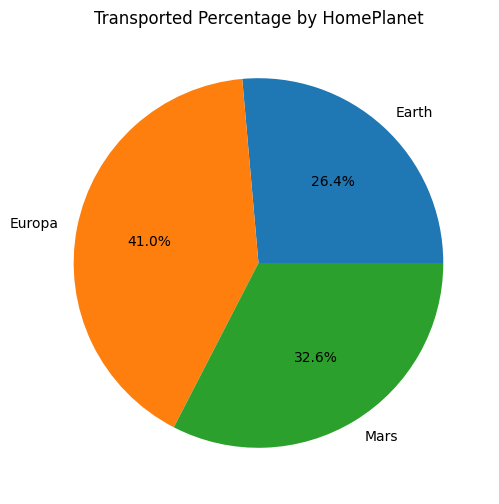

In [19]:
homeplanet_pie = data_train.groupby('HomePlanet')['Transported'].mean()
plt.figure(figsize=(6, 6))
plt.pie(homeplanet_pie, labels=homeplanet_pie.index, autopct='%1.1f%%')
plt.title('Transported Percentage by HomePlanet')
plt.show()

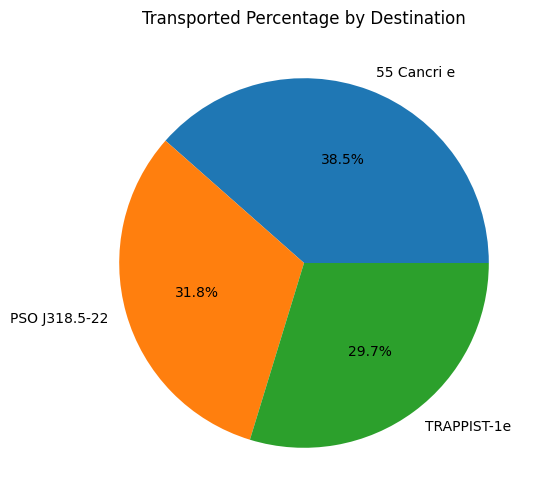

In [20]:
dest_pie = data_train.groupby('Destination')['Transported'].mean()
plt.figure(figsize=(6, 6))
plt.pie(dest_pie, labels=dest_pie.index, autopct='%1.1f%%')
plt.title('Transported Percentage by Destination')
plt.show()

# Advanced  Analysis

Earlier we have seen the age distribution but it looks unclear,so let's break down by creating groups.

Age_group
+50_Age       811
-12_Age       765
12-18_Age     780
18-25_Age    2108
25-35_Age    2177
35-50_Age    1873
Name: count, dtype: int64


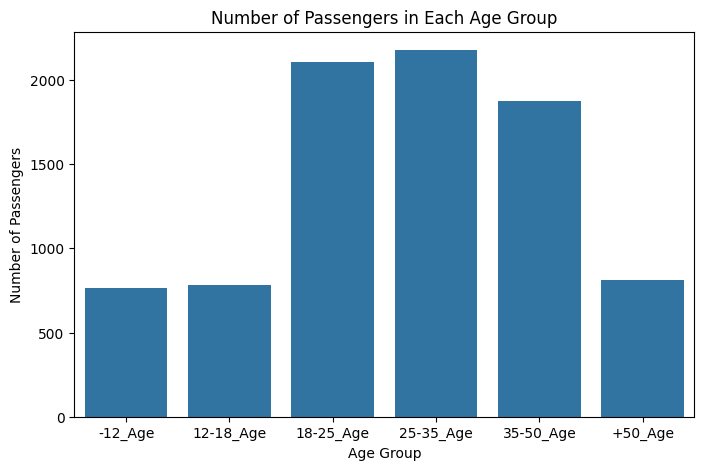

In [21]:

def get_age_group(age):
    if age < 12:
        return '-12_Age'
    elif 12 <= age < 18:
        return '12-18_Age'
    elif 18 <= age < 25:
        return '18-25_Age'
    elif 25 <= age < 35:
        return '25-35_Age'
    elif 35 <= age < 50:
        return '35-50_Age'
    elif age >= 50:
        return '+50_Age'
    else:
        return None
data_train['Age_group'] = data_train['Age'].apply(get_age_group)
print(data_train['Age_group'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
sns.countplot(data=data_train, x='Age_group', order=[
    '-12_Age', '12-18_Age', '18-25_Age', '25-35_Age', '35-50_Age', '+50_Age'
])

plt.title('Number of Passengers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')

plt.show()


    Since  each Passanger is having a unique id called passengerId(gggg_pp) will try to identify the no of groups are there &
    
     how many passangers in each group,so that we can identify whethere the group with more people is **Transported** true or false

In [22]:
# Extract group number from PassengerId (format: gggg_pp)
data_train['Group'] = data_train['PassengerId'].str.split('_').str[0]

# Count unique groups
unique_groups = data_train['Group'].nunique()
print(f"Number of unique groups: {unique_groups}")

# Count passengers in each group
group_counts = data_train['Group'].value_counts().sort_index()
print("Passengers per group:\n", group_counts)

Number of unique groups: 6217
Passengers per group:
 Group
0001    1
0002    1
0003    2
0004    1
0005    1
       ..
9275    3
9276    1
9278    1
9279    1
9280    2
Name: count, Length: 6217, dtype: int64


In [23]:
group_counts.to_csv('group_passenger_counts.csv', header=['PassengerCount'])


In [24]:
df_temp=pd.read_csv('/content/group_passenger_counts.csv')

In [25]:
df_temp.head()

,Group,PassengerCount
0,1,1
1,2,1
2,3,2
3,4,1
4,5,1


okie,now we will identify it's group number

In [26]:
groups_with_8 = group_counts[group_counts == 8].index.tolist()

print("Groups with exactly 8 passengers:")
for group in groups_with_8:
    print(f"Group {group}: 8 passengers")


Groups with exactly 8 passengers:
Group 0984: 8 passengers
Group 4005: 8 passengers
Group 4256: 8 passengers
Group 4498: 8 passengers
Group 5133: 8 passengers
Group 5756: 8 passengers
Group 5885: 8 passengers
Group 8168: 8 passengers
Group 8728: 8 passengers
Group 8796: 8 passengers
Group 8956: 8 passengers
Group 8988: 8 passengers
Group 9081: 8 passengers


Now we have the list of groups with max passengers,so will see whether the passengers are correctly transported or not

In [27]:
groups_with_8 = group_counts[group_counts == 8].index.tolist()
print("Groups with exactly 8 passengers:")
for group in groups_with_8:
    print(f"Group {group}: 8 passengers")
    print(data_train[data_train['Group'] == group][['PassengerId','Name','Transported']])
    print("\n")

Groups with exactly 8 passengers:
Group 0984: 8 passengers
    PassengerId                Name  Transported
910     0984_01         Wen Woodwin        False
911     0984_02                 NaN        False
912     0984_03  Morrie Sweekstarks        False
913     0984_04    Lyde Sweekstarks         True
914     0984_05  Greggy Sweekstarks        False
915     0984_06  Walley Sweekstarks         True
916     0984_07      Shery Flemaney        False
917     0984_08     Alancy Flemaney         True


Group 4005: 8 passengers
     PassengerId                Name  Transported
3736     4005_01  Jonaye Castannison         True
3737     4005_02  Aarone Castannison         True
3738     4005_03  Cliney Castannison        False
3739     4005_04        Dia Spentley        False
3740     4005_05        Lorian River         True
3741     4005_06           Son River         True
3742     4005_07  Bobina Castannison         True
3743     4005_08                 NaN        False


Group 4256: 8 passeng

Instead of thsi,let's plot all teh transported for count of passengers in how many groups.

In [28]:
# New features --Passenger_Group and Passenger_Group_Size
data_train['Passenger_Group'] = data_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
data_train['Passenger_Group_Size'] = data_train['Passenger_Group'].apply(lambda x: data_train['Passenger_Group'].value_counts()[x])

Text(0.5, 1.0, 'Passenger_Group_Size')

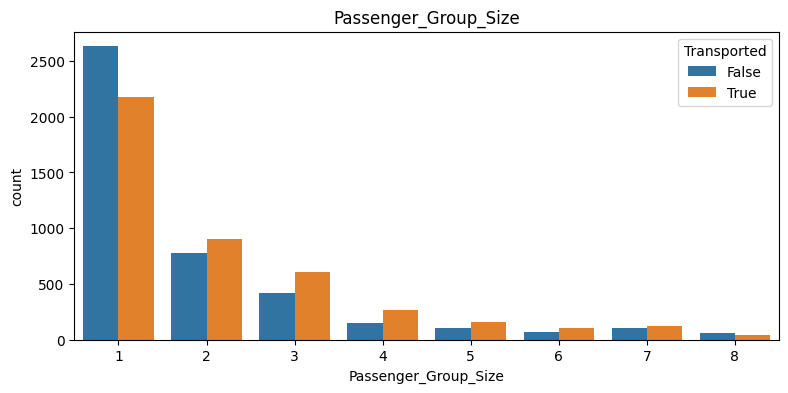

In [29]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,2) #no.of rows in grid,no.of col in grid,index of subplot within that grid
sns.countplot(data=data_train[data_train.Transported.isnull()==False], x='Passenger_Group_Size', hue='Transported')
plt.title('Passenger_Group_Size')


Let's understan about the deck,num,side from cabin

In [30]:
data_train['Cabin'].isnull().sum()

np.int64(199)

In [31]:
data_train['Cabin'].fillna('Missing')

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
...,...
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S


In [32]:
data_train['Cabin'].isnull().sum()

np.int64(199)

so we need to know about the destination of the passenger from homeplanet.
so,we can find correlation between destination and Homeplanet

In [33]:
grouped_by_dest=data_train.groupby(['HomePlanet','Destination'])['HomePlanet'].size().unstack().fillna(0).astype(int)
grouped_by_dest.head()

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


<Axes: xlabel='HomePlanet', ylabel='Destination'>

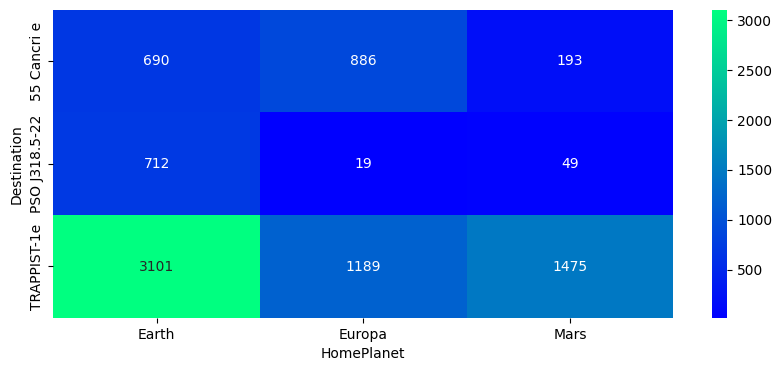

In [34]:
plt.figure(figsize=(10,4))
sns.heatmap(grouped_by_dest.T, annot=True, fmt='g', cmap='winter')

We can understand that many passengers destination from Earth is to reach **TRAPPIST-1e**
Europa and from Mars also the same.

# Dimensionality Reduction

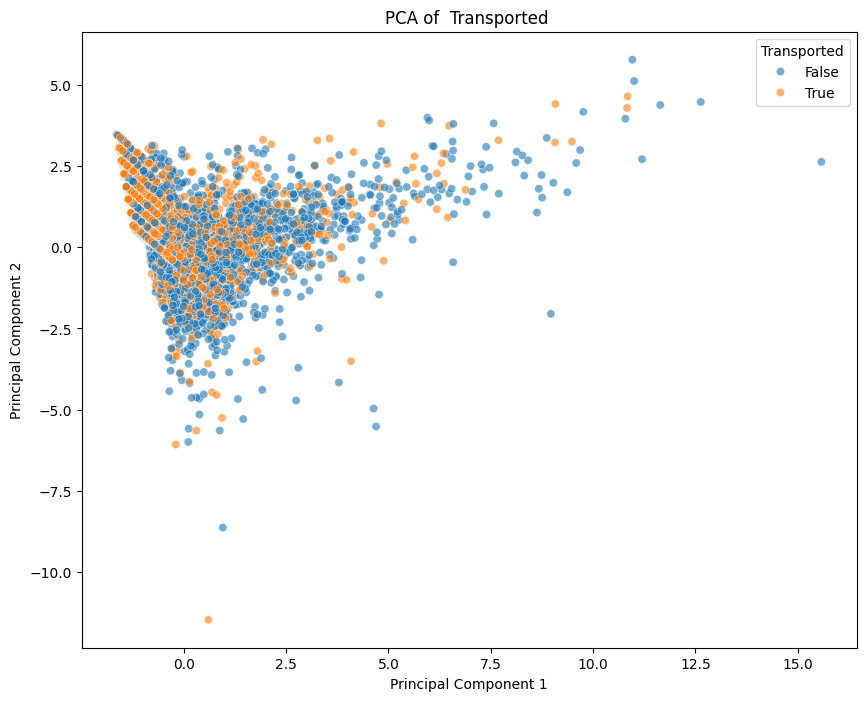

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_cols = data_train.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data_train[num_cols].fillna(data_train[num_cols].median())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=data_train['Transported'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of  Transported ")
plt.show()



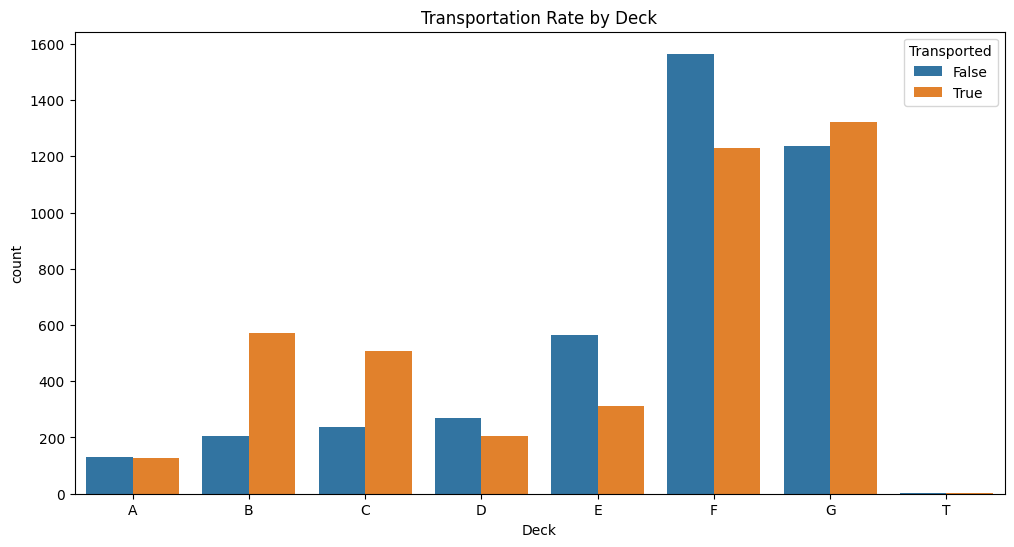

In [39]:
data_train['Deck'] = data_train['Cabin'].str.split('/').str[0]
if 'Deck' in data_train.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_train, x='Deck', hue='Transported', order=sorted(data_train['Deck'].dropna().unique()))
    plt.title("Transportation Rate by Deck")
    plt.show()

In [37]:
data_train['Deck'] = data_train['Cabin'].str.split('/').str[0]
deck_transport_table = pd.crosstab(data_train['Deck'], data_train['Transported'])
print(deck_transport_table)


Transported  False  True 
Deck                     
A              129    127
B              207    572
C              239    508
D              271    207
E              563    313
F             1565   1229
G             1238   1321
T                4      1


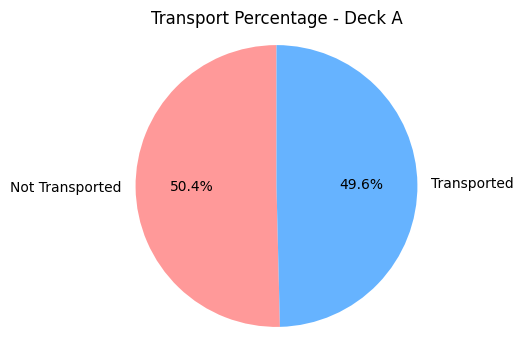

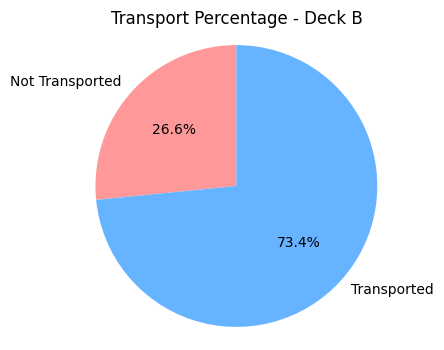

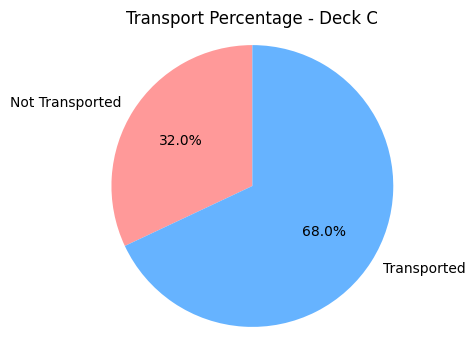

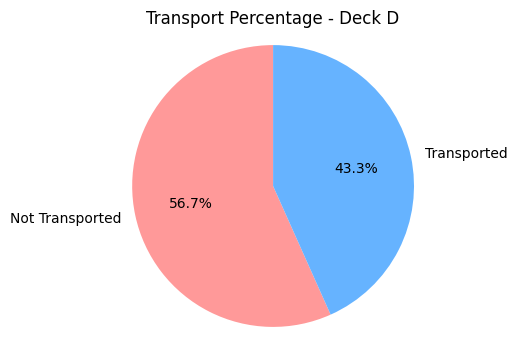

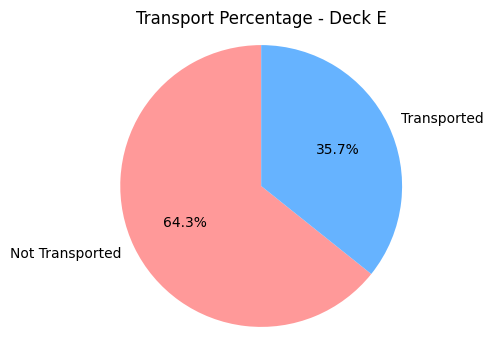

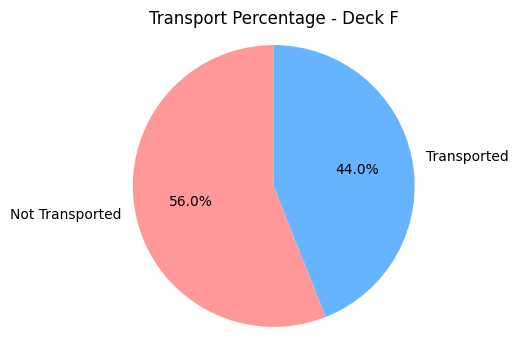

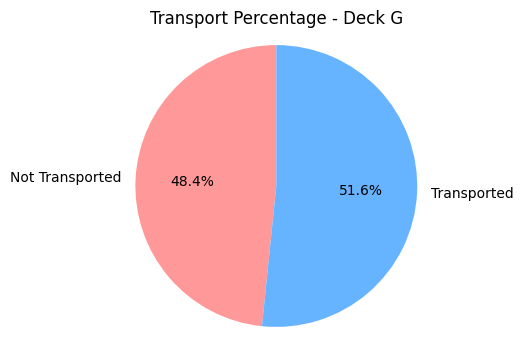

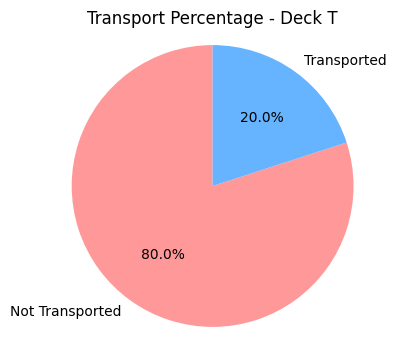

In [38]:
deck_transport_table_pie = pd.crosstab(data_train['Deck'], data_train['Transported']) * 100
# Plot one pie chart per deck
for deck in deck_transport_table_pie.index:
    labels = ['Not Transported', 'Transported']
    values = deck_transport_table_pie.loc[deck]

    plt.figure(figsize=(4, 4))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f"Transport Percentage - Deck {deck}")
    plt.axis('equal')
    plt.show()
